In [3]:
print("Project to Calculate Price of Cars in a Dealership")

Project to Calculate Price of Cars in a Dealership


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Cars = pd.read_csv('UsedCars.csv', usecols = [*range(1,14)])
Cars['New_Price'] = Cars.New_Price.str.split(expand=True)[0]
Cars['New_Price'].fillna(Cars['Price'], inplace=True)
Cars.drop(columns=['Price'], inplace=True)
Cars.rename(columns={"New_Price": "Price"}, inplace=True)
Cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [6]:
print("Data Analysis:-")

Data Analysis:-


In [7]:
print("1. Which cities sell the most used cars? ")
Cars['Location'].value_counts()

1. Which cities sell the most used cars? 


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [8]:
print("2. Which companies sell the most used cars? ")
Cars.Name.str.split(expand=True)[0].value_counts().head(20).sort_values(ascending=False)

2. Which companies sell the most used cars? 


Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Name: 0, dtype: int64

In [9]:
print("3. Do petrol cars have less mileage?\n")
print(Cars.Mileage.str.split(expand=True)[0].astype('float64').dropna().groupby(Cars['Fuel_Type']).mean().sort_values(ascending=False))
print("\nSo, yes.")

3. Do petrol cars have less mileage?

Fuel_Type
CNG       25.418036
LPG       19.385000
Diesel    18.620484
Petrol    17.415204
Name: 0, dtype: float64

So, yes.


In [10]:
print("4. Do manual cars require higher engine capacity?\n")
print(Cars.Engine.str.split(expand=True)[0].astype('float64').dropna().groupby(Cars['Transmission']).mean().sort_values(ascending=False))
print("\nSo, no.")

4. Do manual cars require higher engine capacity?

Transmission
Automatic    2096.511098
Manual       1430.782018
Name: 0, dtype: float64

So, no.


In [10]:
print("Data Visualisation:-")

Data Visualisation:-


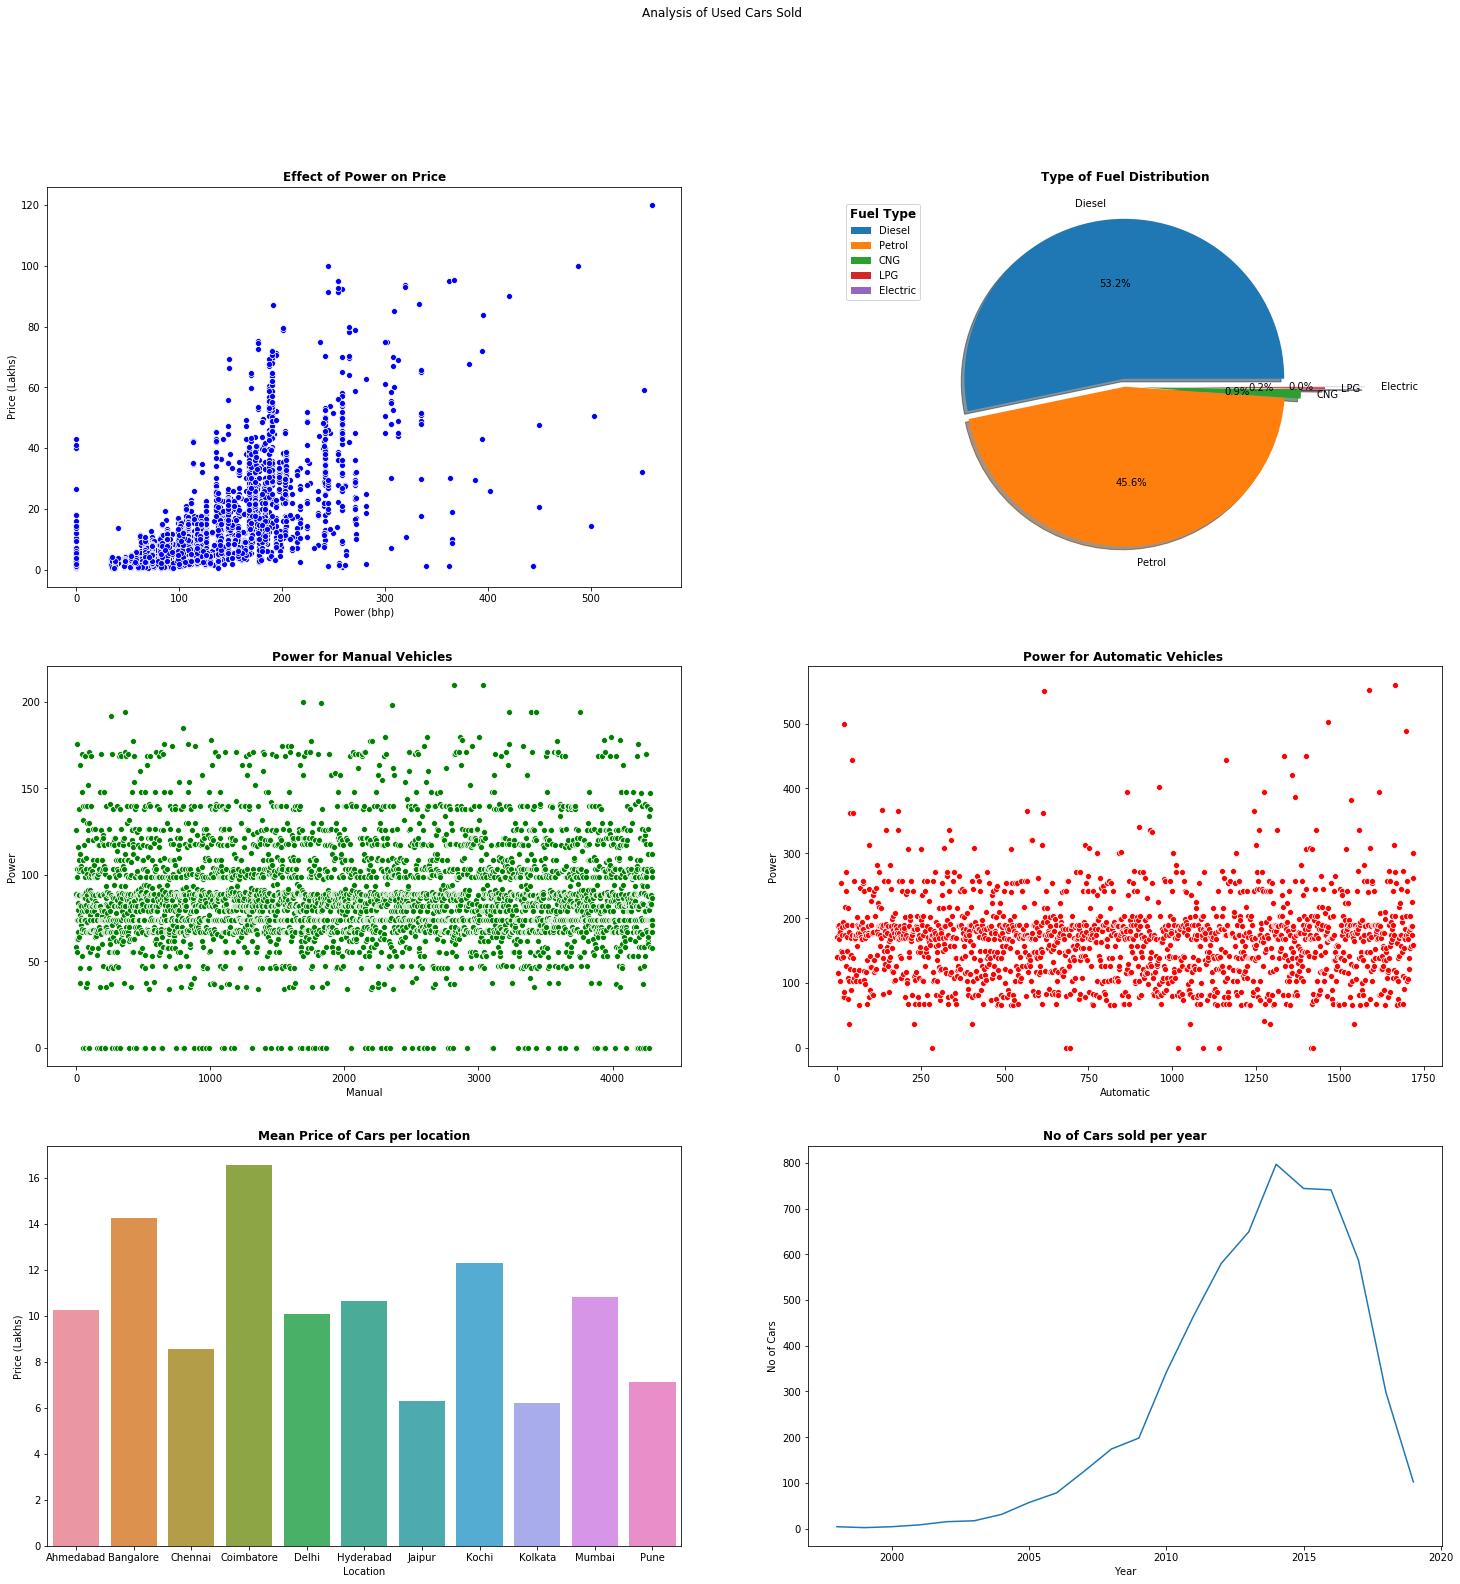

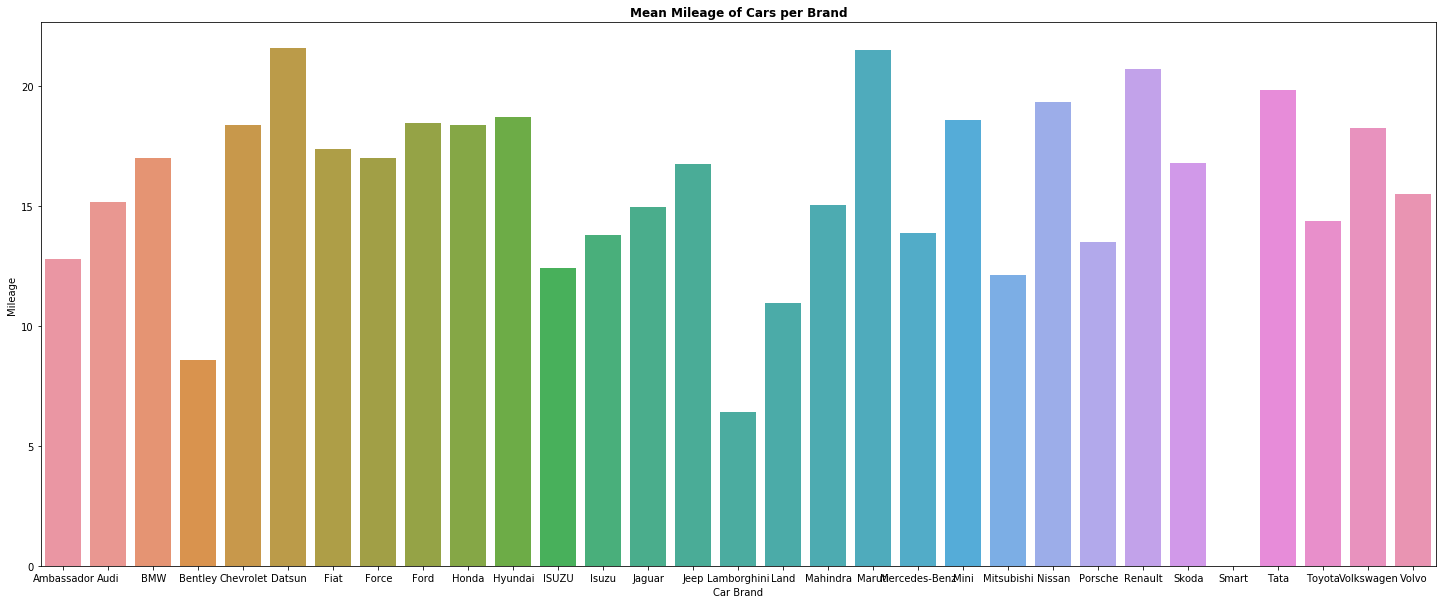

In [11]:
fig, axes = plt.subplots(3,2, figsize=(25,25))
fig.suptitle("Analysis of Used Cars Sold")

x1 = Cars.Power.str.split(expand=True)[0].replace("null", 0).astype('float64').fillna(0)
y1 = Cars.Price.astype('float64')
sns.scatterplot(x=x1, y=y1, ax=axes[0,0], color="blue")
axes[0,0].set_title('Effect of Power on Price', {"fontsize": "large", "fontweight" : 'bold'})
axes[0,0].set_xlabel('Power (bhp)')
axes[0,0].set_ylabel('Price (Lakhs)')

labels1 = Cars['Fuel_Type'].value_counts().index
values1 = Cars['Fuel_Type'].value_counts()
pie_type = axes[0,1].pie(values1, labels=labels1, explode=(0.05,0,0.1,0.25,0.5), autopct="%1.1f%%", shadow=True)
axes[0,1].set_title('Type of Fuel Distribution', {"fontsize": "large", "fontweight" : 'bold'})
legend = axes[0,1].legend(Cars['Fuel_Type'].value_counts().index)
legend.set_title("Fuel Type", prop = {"size": "large", "weight" : 'bold'})
legend.set_bbox_to_anchor((0,0.97))

y2 = Cars.Power.str.split(expand=True)[0].replace('null','0').astype('float64')[Cars['Transmission'] == "Automatic"]
x2 = range(len(y2))
y3 = Cars.Power.str.split(expand=True)[0].replace('null','0').astype('float64')[Cars['Transmission'] == "Manual"]
x3 = range(len(y3))
sns.scatterplot(x=x3, y=y3, ax=axes[1,0], color="green")
sns.scatterplot(x=x2, y=y2, ax=axes[1,1], color="red")
axes[1,0].set_title('Power for Manual Vehicles ', {"fontsize": "large", "fontweight" : 'bold'})
axes[1,0].set_xlabel('Manual')
axes[1,0].set_ylabel('Power')
axes[1,1].set_title('Power for Automatic Vehicles ', {"fontsize": "large", "fontweight" : 'bold'})
axes[1,1].set_xlabel('Automatic')
axes[1,1].set_ylabel('Power')

x4 = Cars.Price.astype('float64').groupby(Cars.Location.str.split(expand=True)[0]).mean().index
y4 = Cars.Price.astype('float64').groupby(Cars.Location.str.split(expand=True)[0]).mean()
sns.barplot(x=x4, y=y4, ax=axes[2,0])
axes[2,0].set_title('Mean Price of Cars per location', {"fontsize": "large", "fontweight" : 'bold'})
axes[2,0].set_xlabel('Location')
axes[2,0].set_ylabel('Price (Lakhs)')

x5 = Cars['Year'].value_counts().index
y5 = Cars['Year'].value_counts()
sns.lineplot(x=x5, y=y5, ax=axes[2,1])
axes[2,1].set_title('No of Cars sold per year', {"fontsize": "large", "fontweight" : 'bold'})
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('No of Cars')

x6 = Cars.Mileage.str.split(expand=True)[0].astype('float64').groupby(Cars.Name.str.split(expand=True)[0]).mean().index
y6 = Cars.Mileage.str.split(expand=True)[0].astype('float64').groupby(Cars.Name.str.split(expand=True)[0]).mean()
plt.figure(figsize=(25,10))
p = sns.barplot(x=x6, y=y6).set_title('Mean Mileage of Cars per Brand', {"fontsize": "large", "fontweight" : 'bold'})
plt.xlabel('Car Brand')
plt.ylabel('Mileage')
plt.show(p)

In [12]:
print("INSIGHTS:-\n"
     " 1. The relation of Engine CC (similarly, power) to Price is approximately linear. This indicates that as specs of the vehicle increase, so does the price.\n"
     " 2. As per the fuel type pie chart, most of the vehicles are run on diesel and petrol. However, as per our analysis, both these fuel types have relatively lower mean mileages.\n"
     " 3. For manual vehicles, the power is in the range of 50-175 bhp. However, automatic vehicles require a power in range 100-500 bhp. This indicates that automatic vehicles require higher specs and linearly, higher price.\n"
     " 4. Price of cars are very much dependent on the location they are sold. Metro cities like Coimbatore and Bangalore sell cars  at an average ~15 lakhs whereas smaller cities like Jaipur and Kolkata sell cars at an average ~6 lakhs.\n"
     " 5. Majoority of the cars have been sold between 2012-2017 with 2014 leading the charts. Specs improve as the years go on and  so do sales.\n"
     " 6. Mileage of cars are very much dependent on the brand of the car. Staple brands such as Maruti, Datsun have mileages as high as in the 20s, whereas luxury brands such as Bentley, Lambhorgini have mileages as low as 6~7.\n")

INSIGHTS:-
 1. The relation of Engine CC (similarly, power) to Price is approximately linear. This indicates that as specs of the vehicle increase, so does the price.
 2. As per the fuel type pie chart, most of the vehicles are run on diesel and petrol. However, as per our analysis, both these fuel types have relatively lower mean mileages.
 3. For manual vehicles, the power is in the range of 50-175 bhp. However, automatic vehicles require a power in range 100-500 bhp. This indicates that automatic vehicles require higher specs and linearly, higher price.
 4. Price of cars are very much dependent on the location they are sold. Metro cities like Coimbatore and Bangalore sell cars  at an average ~15 lakhs whereas smaller cities like Jaipur and Kolkata sell cars at an average ~6 lakhs.
 5. Majoority of the cars have been sold between 2012-2017 with 2014 leading the charts. Specs improve as the years go on and  so do sales.
 6. Mileage of cars are very much dependent on the brand of the c

In [11]:
print("Feature Engineering:-")

Feature Engineering:-


In [3]:
#Feature Engineering
Cars.dropna(axis=0, how='any', inplace=True)
Cars = Cars[(Cars['Mileage'] != "0.0 kmpl") & (Cars['Power'] != "null bhp")]
Cars['Name'] = Cars.Name.str.split(expand=True)[0]
Cars['Mileage'] = Cars.Mileage.str.split(expand=True)[0].astype('float64')
Cars['Engine'] = Cars.Engine.str.split(expand=True)[0].astype('float64')
Cars['Power'] = Cars.Power.str.split(expand=True)[0].astype('float64')
Cars['Price'] = Cars['Price'].astype('float64')
Cars['Seats'] = Cars['Seats'].astype('int')

In [14]:
Cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,8.61
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,7.88
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5,2.65


In [15]:
print("Relations between features and price:-")

Relations between features and price:-


In [16]:
print("1. Name of brand")
print(Cars["Price"].groupby(Cars['Name']).mean().sort_values(ascending=False))
print("Conclusion: The name of brand leads to higher price due to market value and subsequently better features.")

1. Name of brand
Name
Lamborghini      120.000000
Bentley           59.000000
Porsche           49.163125
Jaguar            39.333250
Land              35.155686
Mini              34.807692
Isuzu             33.680000
BMW               32.271641
Mercedes-Benz     28.349507
Audi              26.927735
Jeep              23.115333
Volvo             21.600000
Mitsubishi        14.944444
Toyota            13.411777
ISUZU             12.045000
Force              9.333333
Skoda              9.042765
Mahindra           8.472425
Ford               7.279082
Renault            6.178828
Volkswagen         5.947420
Hyundai            5.925966
Honda              5.889800
Nissan             5.862697
Maruti             4.898536
Tata               4.312896
Fiat               3.874783
Datsun             3.770000
Chevrolet          3.057333
Ambassador         1.350000
Name: Price, dtype: float64
Conclusion: The name of brand leads to higher price due to market value and subsequently better features.


In [17]:
print("2. Location of Manufacture")
print(Cars["Price"].groupby(Cars['Location']).mean().sort_values(ascending=False))
print("Conclusion: The location of sale leads to higher price due to pop. density and better market.")

2. Location of Manufacture
Location
Coimbatore    16.483163
Bangalore     14.469504
Kochi         12.332893
Mumbai        10.798616
Hyderabad     10.796115
Delhi         10.170037
Ahmedabad     10.122431
Chennai        8.757495
Pune           7.222153
Jaipur         6.416783
Kolkata        6.266455
Name: Price, dtype: float64
Conclusion: The location of sale leads to higher price due to pop. density and better market.


In [18]:
print("3. Year of Manufacture")
print(Cars["Price"].groupby(Cars['Year']).mean().sort_values(ascending=False).head(15))
print("Conclusion: The year of sale leads to higher price due to economy rising.")

3. Year of Manufacture
Year
2019    19.471616
2018    17.517475
2017    15.415870
2016    13.076395
2015    11.862412
2014    10.223220
2013     9.550722
2012     7.998486
2011     7.397517
2010     6.518485
2009     5.844127
2008     3.931824
2006     3.673485
2007     3.454476
2004     3.232400
Name: Price, dtype: float64
Conclusion: The year of sale leads to higher price due to economy rising.


In [19]:
print("4. Kilometers driven")
print(Cars["Price"].groupby(pd.cut(Cars['Kilometers_Driven'], np.arange(0,300001, 10000))).mean().sort_values(ascending=False))
print("Conclusion: Inversely proportional due to loss of novelty.")

4. Kilometers driven
Kilometers_Driven
(0, 10000]          14.723298
(10000, 20000]      14.419597
(20000, 30000]      14.176051
(30000, 40000]      11.433154
(40000, 50000]      11.099236
(50000, 60000]      10.317426
(100000, 110000]     9.265526
(240000, 250000]     9.100000
(60000, 70000]       8.425294
(90000, 100000]      8.416637
(200000, 210000]     8.400000
(80000, 90000]       8.164766
(160000, 170000]     7.860526
(150000, 160000]     7.635714
(70000, 80000]       7.611088
(130000, 140000]     7.261400
(250000, 260000]     6.500000
(180000, 190000]     6.465000
(210000, 220000]     6.373333
(110000, 120000]     6.304941
(140000, 150000]     5.927500
(120000, 130000]     5.891125
(170000, 180000]     5.739333
(190000, 200000]     5.486667
(220000, 230000]     4.500000
(260000, 270000]     4.000000
(230000, 240000]     3.675000
(280000, 290000]     3.300000
(290000, 300000]     2.500000
(270000, 280000]          NaN
Name: Price, dtype: float64
Conclusion: Inversely proportiona

In [20]:
print("5. Fuel Type")
print(Cars["Price"].groupby(Cars['Fuel_Type']).mean().sort_values(ascending=False))
print("Conclusion: Diesel vehicles sell higher due to more usage.")

5. Fuel Type
Fuel_Type
Diesel    14.129952
Petrol     6.317849
CNG        3.872364
LPG        2.487000
Name: Price, dtype: float64
Conclusion: Diesel vehicles sell higher due to more usage.


In [21]:
print("6. Transmission")
print(Cars["Price"].groupby(Cars['Transmission']).mean().sort_values(ascending=False))
print("Conclusion: Automatic vehicles due to higher specs sell for higher price.")

6. Transmission
Transmission
Automatic    21.906568
Manual        5.862813
Name: Price, dtype: float64
Conclusion: Automatic vehicles due to higher specs sell for higher price.


In [22]:
print("6. Owner Type")
print(Cars["Price"].groupby(Cars['Owner_Type']).mean().sort_values(ascending=False))
print("Conclusion: Inversely due to loss of novelty.")

6. Owner Type
Owner_Type
First             11.008196
Second             8.272440
Third              5.695743
Fourth & Above     3.567143
Name: Price, dtype: float64
Conclusion: Inversely due to loss of novelty.


In [23]:
print("8. Mileage")
print(Cars["Price"].groupby(pd.cut(Cars['Mileage'], np.arange(5,36,5))).mean().sort_values(ascending=False))
print("Conclusion: Inversely proportional due to luxury cars sacrificing on mileage.")

8. Mileage
Mileage
(5, 10]     25.128824
(10, 15]    16.498921
(15, 20]     9.615271
(20, 25]     7.655814
(25, 30]     6.112225
(30, 35]     4.395714
Name: Price, dtype: float64
Conclusion: Inversely proportional due to luxury cars sacrificing on mileage.


In [27]:
print("9. Engine CC")
print(Cars["Price"].groupby(pd.cut(Cars['Engine'], np.arange(600,3000,300))).mean().sort_values(ascending=False))
print("Conclusion: Unpredictable and sporatic effect. Dropping column.")

9. Engine CC
Engine
(1800, 2100]    23.060873
(2100, 2400]    18.299352
(2400, 2700]    10.533509
(1500, 1800]     8.583950
(1200, 1500]     6.124302
(900, 1200]      4.466119
(600, 900]       2.592698
Name: Price, dtype: float64
Conclusion: Unpredictable and sporatic effect. Dropping column.


In [25]:
print("10. Power")
print(Cars["Price"].groupby(pd.cut(Cars['Power'], np.arange(30,340,20))).mean().sort_values(ascending=False))
print("Conclusion: Inversely proportional due to luxury cars sacrificing on mileage.")

10. Power
Power
(290, 310]    57.062353
(310, 330]    56.170000
(250, 270]    44.054857
(230, 250]    32.389875
(170, 190]    27.789838
(270, 290]    27.221111
(190, 210]    25.673468
(210, 230]    21.648684
(150, 170]    17.598838
(130, 150]    13.236883
(110, 130]     8.445056
(90, 110]      6.821278
(70, 90]       5.335539
(50, 70]       3.278076
(30, 50]       2.158634
Name: Price, dtype: float64
Conclusion: Inversely proportional due to luxury cars sacrificing on mileage.


In [26]:
print("11. Seats")
print(Cars["Price"].groupby(Cars['Seats']).mean().sort_values(ascending=False))
print("Conclusion: Inversely proportional due to smaller luxury cars.")

11. Seats
Seats
2     58.117692
4     21.943131
7     15.565521
6     10.153103
5      9.506299
8      7.690977
10     4.475000
9      4.450000
Name: Price, dtype: float64
Conclusion: Inversely proportional due to smaller luxury cars.


In [5]:
New_Cars = pd.get_dummies(Cars, columns=['Name','Location','Year','Fuel_Type','Transmission','Owner_Type'], drop_first=True)
New_Cars.drop('Engine', axis=1, inplace=True)
New_Cars

,Kilometers_Driven,Mileage,Power,Seats,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,...,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,58.16,5,1.75,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41000,19.67,126.20,5,12.50,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,46000,18.20,88.70,5,8.61,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,87000,20.77,88.76,7,6.00,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,40670,15.20,140.80,5,17.74,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,74.00,5,7.88,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,100000,24.40,71.00,5,4.00,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,55000,14.00,112.00,8,2.90,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,46000,18.90,67.10,5,2.65,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [29]:
print("Most important factor for price has to be brand name due to the sense of luxury.")

Most important factor for price has to be brand name due to the sense of luxury.


In [6]:
print("Processing Data:-\n")
df1 = New_Cars.iloc[:,:4]
df2 = New_Cars.iloc[:,5:]

X_data = pd.concat([df1,df2], axis=1)
Y_data = New_Cars.iloc[:,4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.preprocessing import MinMaxScaler
X_scale = MinMaxScaler()
X_train_norm = X_scale.fit_transform(X_train)
X_test_norm = X_scale.transform(X_test)

y_train_norm = y_train/y_train.max()
y_test_norm = y_test/y_test.max()

Processing Data:-

(3915, 71) (1929, 71) (3915,) (1929,)


In [31]:
print("MODEL 1: LINEAR REGRESSION")

MODEL 1: LINEAR REGRESSION


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()  
linear_model.fit(X_train_norm, y_train_norm)

yPred_train = linear_model.predict(X_train_norm)
yPred_test = linear_model.predict(X_test_norm)

print("Training loss = " + str(0.5 * mean_squared_error(yPred_train, y_train_norm)))
print("Test loss = " + str(0.5 * mean_squared_error(yPred_test, y_test_norm)))

Training loss = 0.0023383933638548306
Test loss = 0.002350902713696151


In [26]:
print("MODEL 2: NEURAL NETWORK")

MODEL 2: NEURAL NETWORK


In [33]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=71,))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(1)) 
model.summary()

opt = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4608      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [34]:
print("Model in action:")
example_batch = X_train_norm[:9]
example_result = model.predict(example_batch)
example_result

Model in action:


array([[-0.21647477],
       [-0.06640548],
       [ 0.01590338],
       [-0.17932355],
       [ 0.10076667],
       [-0.07791636],
       [ 0.10176388],
       [ 0.09937892],
       [-0.08416496]], dtype=float32)

Epoch 1/150
31/31 [==============================] - 0s 8ms/step - loss: 2.2144 - root_mean_squared_error: 1.4881 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1777
Epoch 2/150
31/31 [==============================] - 0s 3ms/step - loss: 1.3870 - root_mean_squared_error: 1.1777 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2216
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 1.0206 - root_mean_squared_error: 1.0103 - val_loss: 0.0665 - val_root_mean_squared_error: 0.2578
Epoch 4/150
31/31 [==============================] - 0s 3ms/step - loss: 0.8100 - root_mean_squared_error: 0.9000 - val_loss: 0.0646 - val_root_mean_squared_error: 0.2542
Epoch 5/150
31/31 [==============================] - 0s 3ms/step - loss: 0.6084 - root_mean_squared_error: 0.7800 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2555
Epoch 6/150
31/31 [==============================] - 0s 3ms/step - loss: 0.4854 - root_mean_squared_error: 0.6967 - val_loss: 0.0573 - val_root_m

Epoch 49/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 50/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 51/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0791
Epoch 52/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0094 - root_mean_squared_error: 0.0967 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0799
Epoch 53/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0096 - root_mean_squared_error: 0.0982 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0790
Epoch 54/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969 - val_loss: 0.0062 - val_

31/31 [==============================] - 0s 3ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 144/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 145/150
31/31 [==============================] - 0s 4ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 146/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 147/150
31/31 [==============================] - 0s 4ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 148/150
31/31 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0043 - val_root_mea

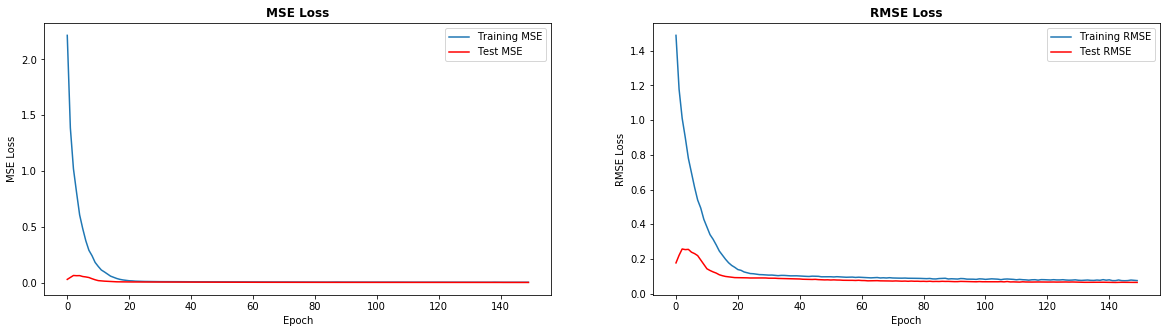

In [35]:
keras_history = model.fit(X_train_norm, y_train_norm, batch_size=128, epochs=150, validation_data=(X_test_norm, y_test_norm))

fig, axes = plt.subplots(1,2, figsize = (20,5))

axes[0].set_title('MSE Loss', {"fontsize": "large", "fontweight" : "bold"})
axes[0].plot(keras_history.history['loss'], label='Training MSE')
axes[0].plot(keras_history.history['val_loss'], color='red', label='Test MSE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].legend()

axes[1].set_title('RMSE Loss', {"fontsize": "large", "fontweight" : 'bold'})
axes[1].plot(keras_history.history['root_mean_squared_error'], label='Training RMSE')
axes[1].plot(keras_history.history['val_root_mean_squared_error'], color='red', label='Test RMSE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('RMSE Loss')
axes[1].legend()

In [51]:
train_loss = model.evaluate(X_train_norm, y_train_norm)
test_loss = model.evaluate(X_test_norm, y_test_norm)
print("Training loss: " + str([i/2 for i in train_loss]))
print("Test loss: " + str([i/2 for i in test_loss]))

61/61 [==============================] - 0s 634us/step - loss: 0.0043 - root_mean_squared_error: 0.0653
Training loss: [0.0019971709698438644, 0.031600404530763626]
Test loss: [0.0021337117068469524, 0.032662760466337204]


In [37]:
print("MODEL 3: K-CLUSTER MODEL")

MODEL 3: K-CLUSTER MODEL


In [38]:
from sklearn.preprocessing import StandardScaler    #Standardize data
scaler = StandardScaler()
k_data = scaler.fit(X_data)
k_data = scaler.transform(X_data)

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters=3, n_init=10, max_iter=300).fit(X_data)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
print("The cluster centers are:- \n")
print(kmeans.cluster_centers_)

The cluster centers are:- 

[[-1.15964043e-01 -6.20777479e-02 -4.46610109e-01 -3.16414741e-01
  -2.04233273e-01 -2.16648522e-01 -1.30822383e-02  3.23222046e-02
   6.10784398e-02 -6.44418178e-03 -2.26629805e-02 -6.49705978e-02
   2.74634422e-01  2.41944694e-01 -1.85026623e-02 -1.30822383e-02
  -8.30168583e-02 -4.29715590e-02 -1.30822383e-02 -9.38281868e-02
  -2.00470920e-01  1.86733948e-01 -2.34251246e-01  9.81232658e-03
  -3.91923279e-02 -1.53963630e-02 -5.23962517e-02 -3.58789045e-02
   4.38926674e-03 -2.88176329e-02 -1.18617325e-01  1.75709707e-02
  -6.00532136e-02 -4.26595011e-02 -3.03058520e-02 -1.13422190e-02
  -2.94022779e-02 -1.20955836e-01 -1.29955801e-03  4.47120233e-02
   3.54769861e-02  1.07700202e-01  5.17926908e-02  2.39343700e-02
   3.84145500e-03  3.38541061e-02  2.90106112e-02  3.12771493e-02
   5.47210883e-02  3.57194000e-02  4.91141863e-02  7.45140474e-02
   6.19393995e-02  4.12544717e-02  7.33145351e-02  1.37692865e-02
  -6.82480558e-02 -7.52258346e-02 -6.34238950e-0

Elbow Plot



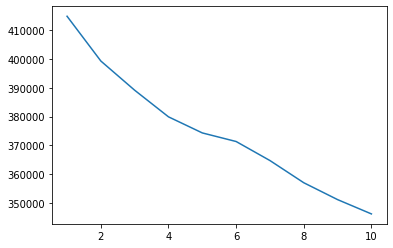

In [41]:
print("Elbow Plot\n")
SSE = []
for i in range(1,11):
    k = KMeans(init = 'k-means++', n_clusters=i, n_init=10, max_iter=300).fit(k_data)
    SSE.append(k.inertia_)
sns.lineplot(range(1,11), SSE)

In [42]:
print("The cluster centers can be classified as (in no order):- \n")
print("1. Lower Price Range \n")
print("2. Medium Price Range \n")
print("3. High Price Range \n")

The cluster centers can be classified as (in no order):- 

1. Lower Price Range 

2. Medium Price Range 

3. High Price Range 



In [45]:
print("The Used Cars data has been analyzed and models of varying complexity and versatility have been developed.\nPrediction and utilisation on new data samples can be implemented.")

The Used Cars data has been analyzed and models of varying complexity and versatility have been developed.
Prediction and utilisation on new data samples can be implemented.
